In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%precision 3
%matplotlib inline
#必要なライブラリのインポート

In [5]:
population = sp.stats.norm(loc = 4, scale = 0.8)#set population as 4 of av and 0.8 of SD

In [8]:
sample_mean_array = np.zeros(100000)

In [9]:
np.random.seed(1)
for i in range(0, 100000):
    sample = population.rvs(size = 10)
    sample_mean_array[i] = sp.mean(sample)

In [10]:
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 3.981, 3.848, 4.176])

In [11]:
sp.mean(sample_mean_array)

4.000521443446416

In [12]:
sp.std(sample_mean_array, ddof = 1)

0.2531249779717917

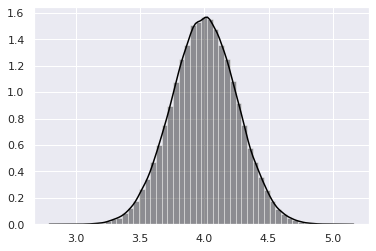

In [13]:
sns.distplot(sample_mean_array, color = 'black')

## サンプルサイズが大なら標本平均は母平均に近いのか

・　対象：標本平均

・　変化させるモノ：サンプルサイズ

・調べたいこと：サンプルサイズがデカくなると、標本平均は母平均に近づく


In [14]:
size_array = np.arange(start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [15]:
sample_mean_array_size = np.zeros(len(size_array))

In [16]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

Text(0, 0.5, 'sample mean')

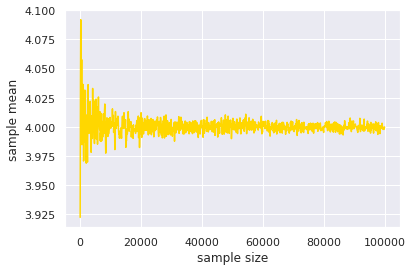

In [17]:
plt.plot(size_array, sample_mean_array_size,
        color = 'gold')
plt.xlabel("sample size")
plt.ylabel("sample mean")

In [22]:
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = sp.mean(sample)
    return(sample_mean_array)

In [29]:
np.random.seed(1)
sp.mean(calc_sample_mean(size = 10, n_trial = 10000))

4.004202422791747

In [34]:
# サンプルサイズを変化させた場合の標本平均の分布


np.random.seed(1)
size_10 = calc_sample_mean(size =10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean":size_10,
    "size"       :np.tile("size 10", 10000)
})

size_20 = calc_sample_mean(size =20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean":size_20,
    "size"       :np.tile("size 20", 10000)
})

size_30 = calc_sample_mean(size = 30, n_trial = 10000)
size_30_df = pd.DataFrame({
    "sample_mean":size_30,
    "size"       :np.tile("size 30", 10000)
})


sim_result =pd.concat([size_10_df, size_20_df, size_30_df])
print(sim_result.head())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


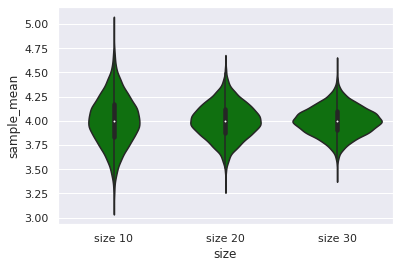

In [37]:
sns.violinplot(x = "size", y = "sample_mean", data = sim_result, color  ="green")

## 標本平均の標準偏差は、母標準平均よりも小さいのか


・　対象：標本平均の標準偏差

・　変化させるモノ：サンプルサイズ

In [38]:
size_array = np.arange(start = 2, stop = 102, step = 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [39]:
sample_mean_std_array = np.zeros(len(size_array))

In [42]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size = size_array[i],
                                  n_trial = 100)
    sample_mean_std_array[i] = sp.std(sample_mean, ddof = 1)

Text(0, 0.5, 'mean_std value')

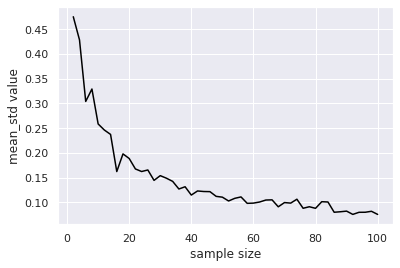

In [43]:
plt.plot(size_array, sample_mean_std_array, color = 'black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

**標準誤差**

サンプルサイズを大きくすると、標準誤差は小さくなる

$$標準誤差=\frac{\sigma}{\sqrt{N}}$$

In [44]:
SE = 0.8 / np.sqrt(size_array)
SE

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0, 0.5, 'mean_std value')

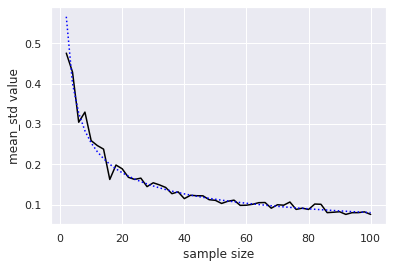

In [45]:
plt.plot(size_array, sample_mean_std_array, color = 'black')
plt.plot(size_array, SE, color = 'blue', linestyle = 'dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

In [46]:
sample_var_array =np.zeros(10000)

In [47]:
np.random.seed(1)
for i in range(0,10000):
    sample = population.rvs(size = 10)
    sample_var_array[i] = sp.var(sample, ddof = 0)

In [48]:
sp.mean(sample_var_array)

0.5746886877332101

In [49]:
np.random.seed(1)
for i in range(0,10000):
    sample = population.rvs(size = 10)
    sample_var_array[i] = sp.var(sample, ddof = 1)

In [50]:
sp.mean(sample_var_array)

0.6385429863702334

## サンプルサイズが大なら、不偏分散は母分散に近い


In [51]:
size_array = np.arange(start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [52]:
unbias_var_array_size = np.zeros(len(size_array))

In [53]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = sp.var(sample, ddof=1)

Text(0, 0.5, 'unbias var')

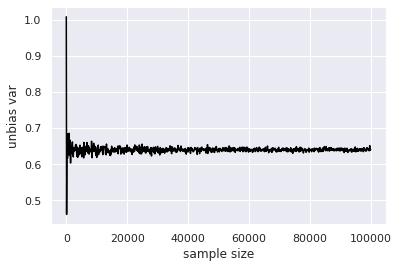

In [54]:
plt.plot(size_array, unbias_var_array_size, color = 'black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

#### 用語チェック

**不偏性**

推定量の期待値が真の母数となる特性を**不偏性**という

つまり、平均すると過大にも過小にもなっていないということ

**一致性**

サンプルサイズが大きくなると、推定量が真の母数に近づいていく特性のこと

つまり、サンプルサイズが無限の場合、推定量と母数が一致するということ

**大数の法則**

標本が大きくなるにつれて、標本平均が母平均に近づくという法則

**中心極限定理**

母集団分布が何であっても、サンプルサイズが大きい場合には、確率変数の和は正規分布に近いものになる

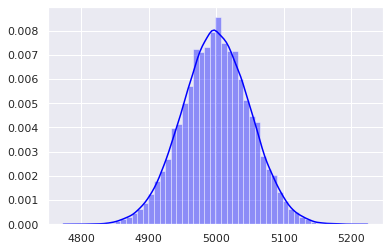

In [55]:
#中心極限定理の例

n_size = 10000
n_trial = 50000

coin = np.array([0, 1])

count_coin = np.zeros(n_trial)

np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = sp.sum(np.random.choice(coin, size = n_size, replace = True))
    
sns.distplot(count_coin, color = 'blue')